In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import platform
import folium
import json
geo_path = 'data/skorea_municipalities_geo_simple.json'

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)


In [2]:
usecols = ['다발지그룹식별자','관할경찰서','발생건수','사상자수','사망자수','중상자수','경상자수','부상신고자수','경도','위도']

In [3]:
Bicycle_accident_2012_2014 = pd.read_csv('data/2012_2014_Bicycle_accident.csv',
                                                       usecols = usecols, encoding = 'euc-kr')
Bicycle_accident_2012 = Bicycle_accident_2012_2014[(Bicycle_accident_2012_2014["다발지그룹식별자"]>=2012000) &
                                (Bicycle_accident_2012_2014["다발지그룹식별자"]<2013000)]
Bicycle_accident_2013 = Bicycle_accident_2012_2014[(Bicycle_accident_2012_2014["다발지그룹식별자"]>=2013000) &
                                (Bicycle_accident_2012_2014["다발지그룹식별자"]<2014000)]
Bicycle_accident_2014 = Bicycle_accident_2012_2014[(Bicycle_accident_2012_2014["다발지그룹식별자"]>=2014000) &
                                (Bicycle_accident_2012_2014["다발지그룹식별자"]<2015000)]
Bicycle_accident_2015 = pd.read_csv('data/2015_Bicycle_accident.csv',
                                                       usecols = usecols, encoding = 'euc-kr')
Bicycle_accident_2016 = pd.read_csv('data/2016_Bicycle_accident.csv',
                                                       usecols = usecols, encoding = 'euc-kr')

Bicycle_accident_sum = pd.concat([Bicycle_accident_2012,Bicycle_accident_2013,Bicycle_accident_2014,Bicycle_accident_2015,
                                  Bicycle_accident_2016], ignore_index = True)

In [4]:
Bicycle_accident_sum.head()

,다발지그룹식별자,관할경찰서,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
0,2013099,서울특별시 종로구2,4,4,0,1,2,1,126.981070,37.570279
1,2013099,서울특별시 용산구1,5,5,0,3,2,0,126.961790,37.522868
2,2013099,서울특별시 성동구2,4,5,0,3,2,0,127.047929,37.540795
3,2013099,서울특별시 광진구14,7,7,0,6,1,0,127.088548,37.553411
4,2013099,서울특별시 광진구11,6,6,1,4,1,0,127.090743,37.549358


In [5]:
Bicycle_accident_sum['지역'] = Bicycle_accident_sum['관할경찰서'].str.split(" ",expand=True)[0]

Bicycle_accident_sum = Bicycle_accident_sum.replace({"지역":"강원도"},{"지역":"강원"})
Bicycle_accident_sum = Bicycle_accident_sum.replace({"지역":"경기도"},{"지역":"경기"})
Bicycle_accident_sum = Bicycle_accident_sum.replace({"지역":"경상북도"},{"지역":"경북"})
Bicycle_accident_sum = Bicycle_accident_sum.replace({"지역":"경상남도"},{"지역":"경남"})
Bicycle_accident_sum = Bicycle_accident_sum.replace({"지역":"충청북도"},{"지역":"충북"})
Bicycle_accident_sum = Bicycle_accident_sum.replace({"지역":"충청남도"},{"지역":"충남"})
Bicycle_accident_sum = Bicycle_accident_sum.replace({"지역":"전라남도"},{"지역":"전남"})
Bicycle_accident_sum = Bicycle_accident_sum.replace({"지역":"전라북도"},{"지역":"전북"})
Bicycle_accident_sum = Bicycle_accident_sum.replace({"지역":"대구광역시"},{"지역":"대구"})
Bicycle_accident_sum = Bicycle_accident_sum.replace({"지역":"대전광역시"},{"지역":"대전"})
Bicycle_accident_sum = Bicycle_accident_sum.replace({"지역":"울산광역시"},{"지역":"울산"})
Bicycle_accident_sum = Bicycle_accident_sum.replace({"지역":"광주광역시"},{"지역":"광주"})
Bicycle_accident_sum = Bicycle_accident_sum.replace({"지역":"부산광역시"},{"지역":"부산"})
Bicycle_accident_sum = Bicycle_accident_sum.replace({"지역":"인천광역시"},{"지역":"인천"})
Bicycle_accident_sum = Bicycle_accident_sum.replace({"지역":"제주특별자치도"},{"지역":"제주"})
Bicycle_accident_sum = Bicycle_accident_sum.replace({"지역":"세종특별자치시"},{"지역":"세종"})
Bicycle_accident_sum = Bicycle_accident_sum.replace({"지역":"서울특별시"},{"지역":"서울"})


In [6]:
Bicycle_accident_sum.head()

,다발지그룹식별자,관할경찰서,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,지역
0,2013099,서울특별시 종로구2,4,4,0,1,2,1,126.981070,37.570279,서울
1,2013099,서울특별시 용산구1,5,5,0,3,2,0,126.961790,37.522868,서울
2,2013099,서울특별시 성동구2,4,5,0,3,2,0,127.047929,37.540795,서울
3,2013099,서울특별시 광진구14,7,7,0,6,1,0,127.088548,37.553411,서울
4,2013099,서울특별시 광진구11,6,6,1,4,1,0,127.090743,37.549358,서울


In [7]:
regions = ['경기', '서울', '울산', '충북', '전북', '전남', '경남', '인천', '세종', '광주', '부산', '대구',
           '제주', '대전', '강원', '충남', '경북']
Bicycle_accident = pd.DataFrame(index=regions, 
                                columns = ['총사고발생수','총사상자수','총사망자수','총중상자수','총경상자수','총부상신고자수'])

In [8]:
def summary(df,region,category):
    # dataFrame, 지역, 컬럼
    result = df[df["지역"]==region][category].sum()
    return result

In [9]:
for region in regions:
    Bicycle_accident.loc[region]["총사망자수"] = summary(Bicycle_accident_sum,region,"사망자수")
    Bicycle_accident.loc[region]["총사상자수"] = summary(Bicycle_accident_sum,region,"사상자수")
    Bicycle_accident.loc[region]["총중상자수"] = summary(Bicycle_accident_sum,region,"중상자수")
    Bicycle_accident.loc[region]["총경상자수"] = summary(Bicycle_accident_sum,region,"경상자수")
    Bicycle_accident.loc[region]["총부상신고자수"] = summary(Bicycle_accident_sum,region,"부상신고자수")
    Bicycle_accident.loc[region]["총사고발생수"] = len(Bicycle_accident_sum[Bicycle_accident_sum["지역"]==region])

In [10]:
Bicycle_accident.sort_values(by='총사고발생수', ascending = False)

,총사고발생수,총사상자수,총사망자수,총중상자수,총경상자수,총부상신고자수
서울,783,4707,44,1507,2326,830
대구,352,2043,24,725,1048,246
경기,322,1778,29,627,917,205
경북,119,616,11,272,299,34
충북,67,349,3,121,203,22
경남,56,293,1,124,148,20
전북,55,267,8,85,168,6
부산,50,262,6,108,114,34
대전,50,261,5,100,145,11
인천,43,215,5,93,102,15


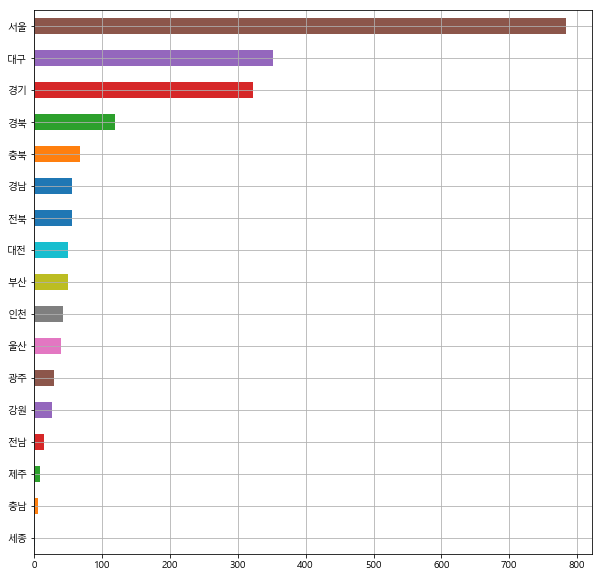

In [11]:
Bicycle_accident['총사고발생수'].sort_values().plot(kind='barh',grid=True, figsize=(10,10))
plt.show()

In [12]:
Bicycle_accident_sum['발생건수'] = Bicycle_accident_sum['발생건수'].astype(float)

map = folium.Map(location=[37.5502,126.982], zoom_start = 12) #서울특별시 
for n in Bicycle_accident_sum.index:
     if Bicycle_accident_sum["지역"][n] == "서울":
            folium.CircleMarker([Bicycle_accident_sum['위도'][n],Bicycle_accident_sum['경도'][n]],
                         radius = Bicycle_accident_sum['발생건수'][n] * 3,
                         color='#3186cc',fill_color='#3186cc').add_to(map)

map